# <font color='#C0392B'> Diabetes Prediction

## <font color='##8E44AD'>About Dataset

### The Diabetes prediction dataset is a collection of medical and demographic data from patients, along with their diabetes status (positive or negative). The data includes features such as age, gender, body mass index (BMI), hypertension, heart disease, smoking history, HbA1c level, and blood glucose level. This dataset can be used to build machine learning models to predict diabetes in patients based on their medical history and demographic information. This can be useful for healthcare professionals in identifying patients who may be at risk of developing diabetes and in developing personalized treatment plans. Additionally, the dataset can be used by researchers to explore the relationships between various medical and demographic factors and the likelihood of developing diabetes.

## <font color='##8E44AD'> Data Description:

### It seems like the data with various features for each individual, and the target variable "diabetes" indicates whether the person has diabetes (1) or not (0). It appears to be a dataset for binary classification, where the goal is to predict diabetes based on the given features. Let's go through the data and interpret each feature:

+ Gender: The gender of the individual (e.g., Male or Female).

+ Age: The age of the individual in years.

+ Hypertension: Whether the individual has hypertension (1) or not (0).

+ Heart Disease: Whether the individual has heart disease (1) or not (0).

+ Smoking History: The history of smoking for the individual (e.g., "never," "current," or "No Info").

+ BMI (Body Mass Index): The body mass index of the individual, which is calculated as weight in kilograms divided by the square of height in meters.

+ HbA1c Level: The level of HbA1c (glycated hemoglobin) in the blood, which is an indicator of long-term blood glucose control.

+ Blood Glucose Level: The blood glucose level of the individual.

+ Diabetes: The target variable indicating whether the individual has diabetes (1) or not (0).

In [1]:
# import the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Set the color palette
a=sns.set_palette('pastel')

In [2]:
data=pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
data.shape

(100000, 9)

In [4]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [7]:
##checking for null values
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [8]:
data[data.duplicated(keep='first')].shape

(3854, 9)

In [9]:
data.drop_duplicates(keep='first',inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [11]:
data[data.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes


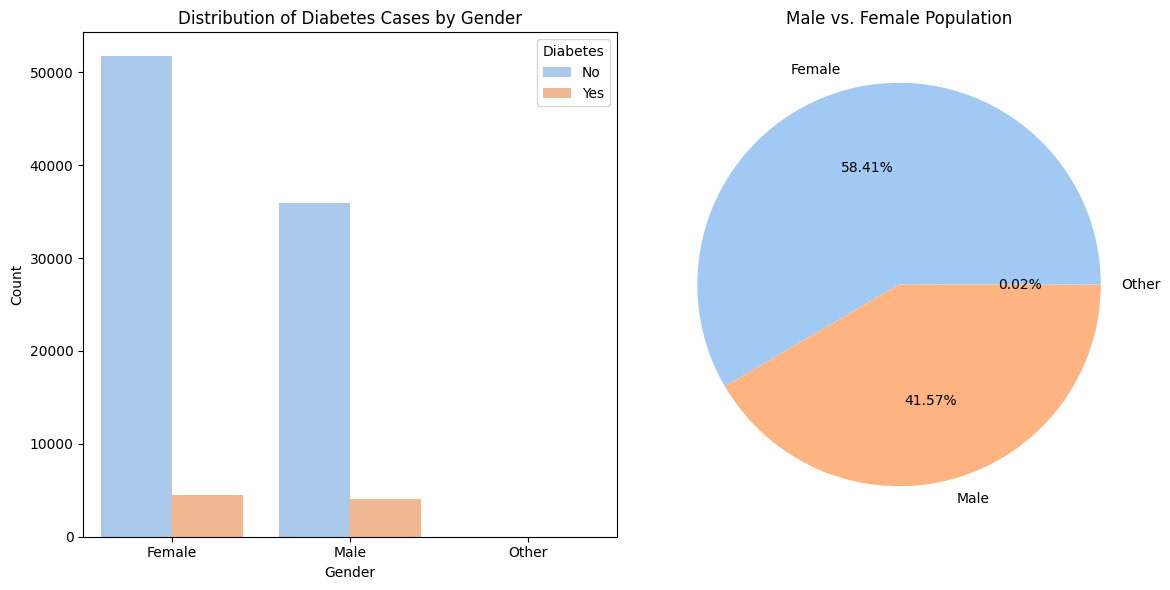

In [12]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Bar plot - Distribution of diabetes cases by gender
sns.countplot(data=data, x='gender', hue='diabetes', ax=axes[0])

axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Diabetes Cases by Gender')
axes[0].legend(title='Diabetes', labels=['No', 'Yes'])

# Plot 2: Pie chart - Male vs. Female population
gender_counts = data['gender'].value_counts()

axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%')
axes[1].set_title('Male vs. Female Population')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

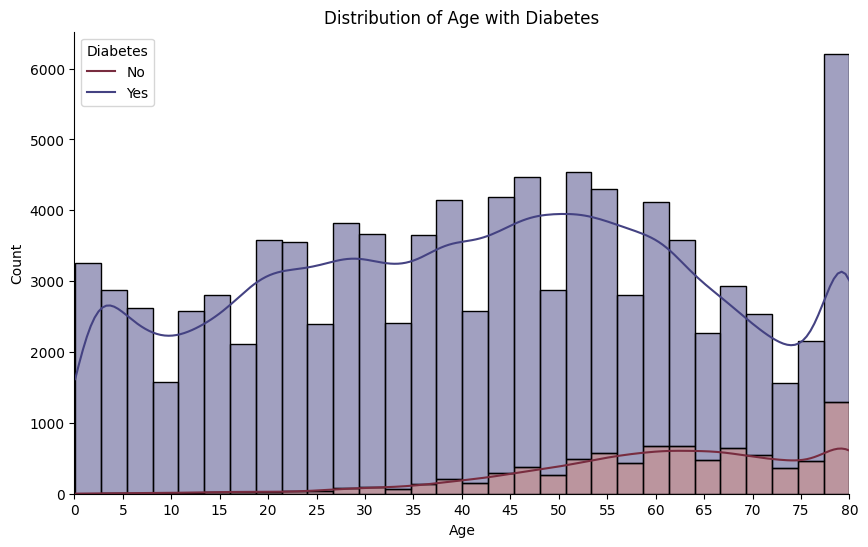

In [13]:
# figure size
plt.figure(figsize=(10, 6))

# Customize histogram
sns.histplot(data=data, x='age', hue='diabetes', kde=True, bins=30, multiple="stack",palette='icefire' )

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age with Diabetes')
plt.legend(title='Diabetes', labels=['No', 'Yes'])

# Adjust spacing between bars
ax = plt.gca()

# Adjust x-axis limit
ax.set_xlim([0, data['age'].max()])

# Set x-axis tick interval
ax.set_xticks(range(0, int(data['age'].max()) + 1, 5))

# Remove Top and Right Borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

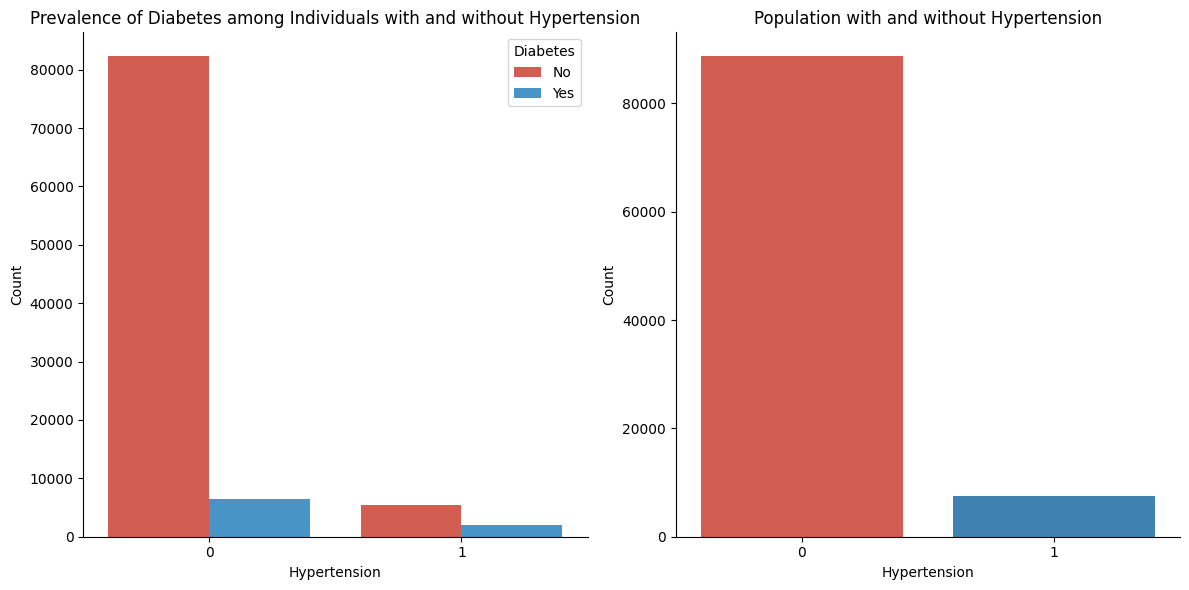

In [14]:
# Create a figure with size 12x6 inches
plt.figure(figsize=(12, 6))

# Plot 1: Prevalence of Diabetes among Individuals with and without Hypertension
plt.subplot(1, 2, 1)
sns.countplot(data=data, x='hypertension', hue='diabetes', palette=['#E74C3C', '#3498DB'])
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Prevalence of Diabetes among Individuals with and without Hypertension')
plt.legend(title='Diabetes', labels=['No', 'Yes'])

# Adjust spacing between bars for the first subplot
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)    # Remove top border
ax1.spines['right'].set_visible(False)  # Remove right border

# Plot 2: Population with or without Hypertension
plt.subplot(1, 2, 2)
sns.countplot(data=data, x='hypertension', palette=['#E74C3C', '#2E86C1'])
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.title('Population with and without Hypertension')

# Adjust spacing between bars for the second subplot
ax2 = plt.gca()
ax2.spines['top'].set_visible(False)    # Remove top border
ax2.spines['right'].set_visible(False)  # Remove right border

# Adjust spacing between subplots to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()


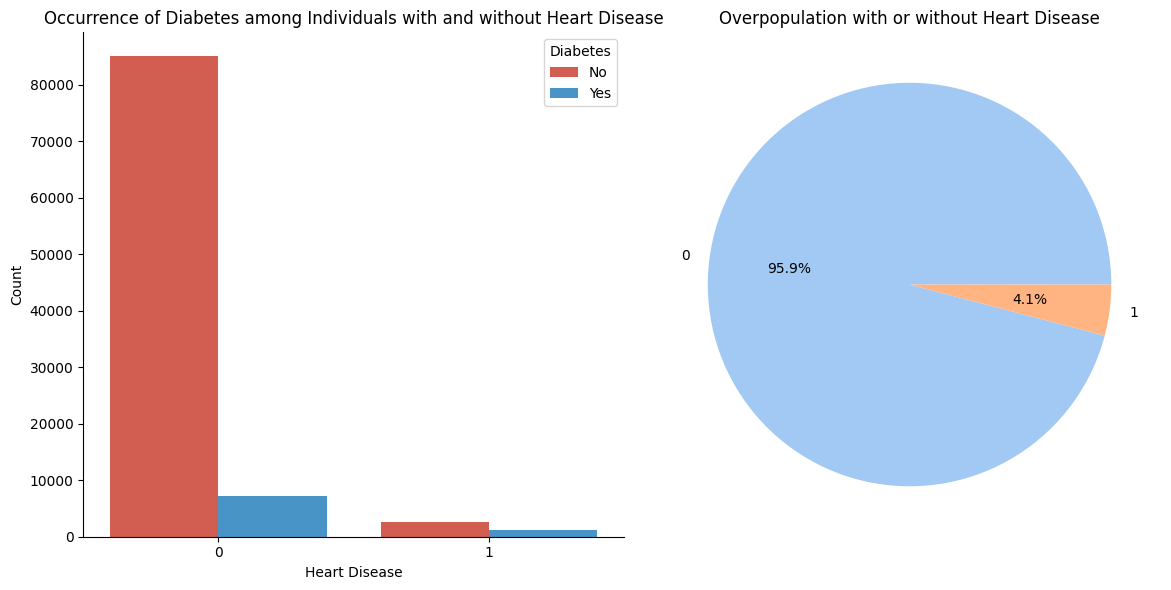

In [15]:
# Create a figure with 1 row and 2 columns, with a size of 12x6 inches
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Occurrence of Diabetes among Individuals with and without Heart Disease
sns.countplot(data=data, x='heart_disease', hue='diabetes', palette=['#E74C3C', '#3498DB'], ax=axs[0])
axs[0].set_xlabel('Heart Disease')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])
axs[0].spines['top'].set_visible(False)    # Remove top border
axs[0].spines['right'].set_visible(False)  # Remove right border

# Plot 2: Overpopulation with or without Heart Disease (Pie Chart)
heart_disease_counts = data['heart_disease'].value_counts()
axs[1].pie(heart_disease_counts, labels=heart_disease_counts.index, autopct='%1.1f%%')
axs[1].set_title('Overpopulation with or without Heart Disease')

# Adjust spacing between subplots to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()


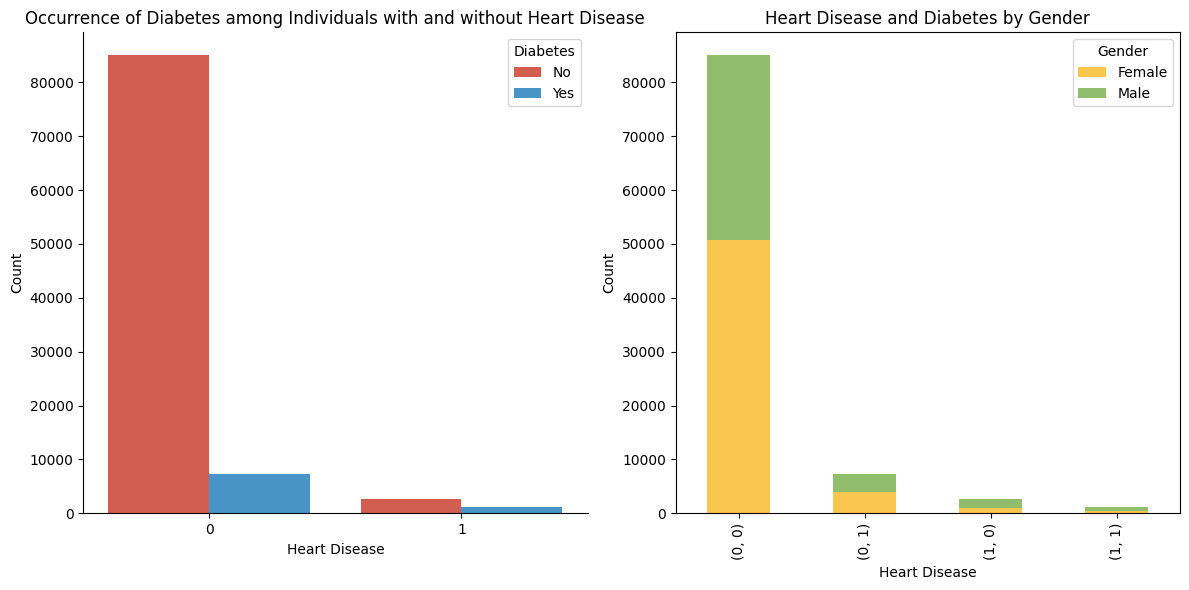

In [16]:
# Create a figure with 1 row and 2 columns, with a size of 12x6 inches
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Occurrence of Diabetes among Individuals with and without Heart Disease
sns.countplot(data=data, x='heart_disease', hue='diabetes', palette=['#E74C3C', '#3498DB'], ax=axs[0])

# Customize the first subplot
axs[0].set_xlabel('Heart Disease')
axs[0].set_ylabel('Count')
axs[0].set_title('Occurrence of Diabetes among Individuals with and without Heart Disease')
axs[0].legend(title='Diabetes', labels=['No', 'Yes'])  # Add a legend to show 'Diabetes' labels
axs[0].spines['top'].set_visible(False)  # Remove top border
axs[0].spines['right'].set_visible(False)  # Remove right border

# Plot 2: Heart Disease and Diabetes by Gender (Stacked Bar Plot)
heart_diabetes_gender_counts = data.groupby(['heart_disease', 'diabetes', 'gender']).size().unstack().fillna(0)
heart_diabetes_gender_counts.plot(kind='bar', stacked=True, ax=axs[1], color=['#F9C74F', '#90BE6D'])

# Customize the second subplot
axs[1].set_xlabel('Heart Disease')
axs[1].set_ylabel('Count')
axs[1].set_title('Heart Disease and Diabetes by Gender')
axs[1].legend(title='Gender', labels=['Female', 'Male'])  # Add a legend to show 'Gender' labels

# Adjust spacing between subplots to avoid overlapping
plt.tight_layout()

# Display the plots
plt.show()


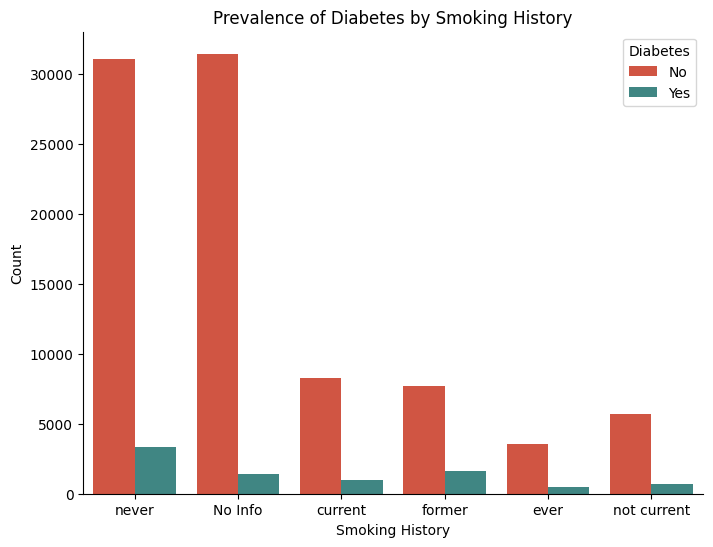

In [17]:
# Create a figure with size 8x6 inches
plt.figure(figsize=(8, 6))

# Plot: Prevalence of Diabetes by Smoking History
sns.countplot(data=data, x='smoking_history', hue='diabetes', palette=['#E7432C', '#34928D'])

# Customize the plot
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.title('Prevalence of Diabetes by Smoking History')
plt.legend(title='Diabetes', labels=['No', 'Yes'])  # Add a legend to show 'Diabetes' labels

# Adjust spacing between bars
ax = plt.gca()
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border

# Display the plot
plt.show()


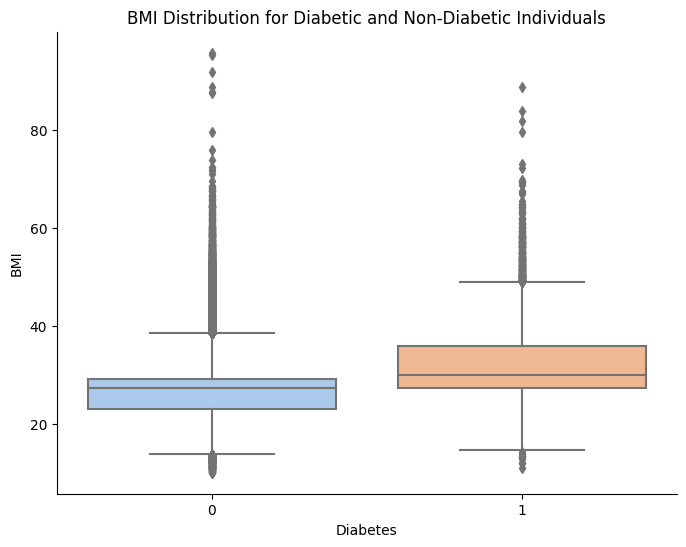

In [18]:
# Create a figure with size 8x6 inches
plt.figure(figsize=(8, 6))

# Box Plot: BMI Distribution for Diabetic and Non-Diabetic Individuals
sns.boxplot(data=data, x='diabetes', y='bmi')

# Customize the plot
plt.xlabel('Diabetes')
plt.ylabel('BMI')
plt.title('BMI Distribution for Diabetic and Non-Diabetic Individuals')

# Adjust spacing between boxes and whiskers
ax = plt.gca()
ax.spines['top'].set_visible(False)  # Remove top border
ax.spines['right'].set_visible(False)  # Remove right border

# Display the plot
plt.show()


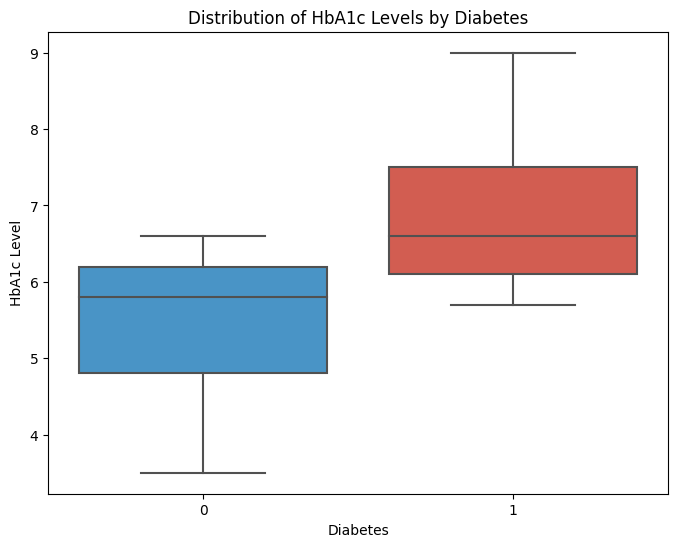

In [19]:
# Create a figure with size 8x6 inches
plt.figure(figsize=(8, 6))

# Box Plot: Distribution of HbA1c Levels by Diabetes
sns.boxplot(data=data, x='diabetes', y='HbA1c_level', palette=['#3498DB', '#E74C3C'])

# Customize the plot
plt.xlabel('Diabetes')
plt.ylabel('HbA1c Level')
plt.title('Distribution of HbA1c Levels by Diabetes')

# Display the plot
plt.show()

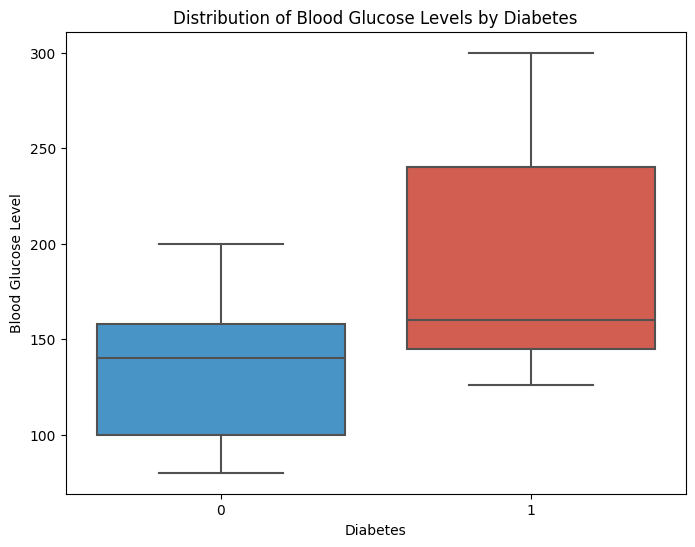

In [20]:
# Create a figure with size 8x6 inches
plt.figure(figsize=(8, 6))

# Box Plot: Distribution of Blood Glucose Levels by Diabetes
sns.boxplot(data=data, x='diabetes', y='blood_glucose_level', palette=['#3498DB', '#E74C3C'])

# Customize the plot
plt.xlabel('Diabetes')
plt.ylabel('Blood Glucose Level')
plt.title('Distribution of Blood Glucose Levels by Diabetes')

# Display the plot
plt.show()


In [21]:
from sklearn.preprocessing import LabelEncoder

# Get the names of categorical columns (columns with object/string data type)
categorical_columns = data.select_dtypes(include=['object']).columns

# Loop through each categorical column and perform label encoding
for column in categorical_columns:
    # Create a new instance of LabelEncoder for each column
    label_encoder = LabelEncoder()

    # Fit and transform the values in the current column to encoded numerical labels
    encoded_values = label_encoder.fit_transform(data[column])

    # Replace the original categorical column with the encoded numerical values
    data[column] = encoded_values


In [22]:
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  int64  
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  int64  
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 7.3 MB


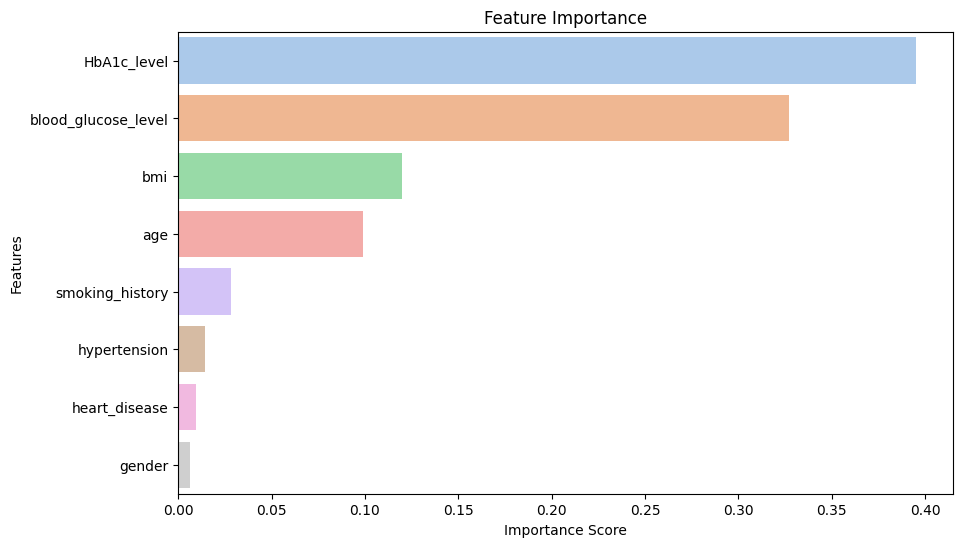

In [24]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Number of top features to select
num_features = 15

# Target variable for classification
target_variable = "diabetes"

# Separate features (X) and target variable (y)
X = data.drop(target_variable, axis=1)
y = data[target_variable]

# Create a Random Forest Classifier model
model = RandomForestClassifier()

# Train the model on the data
model.fit(X, y)

# Get feature importance scores from the model
importance_scores = model.feature_importances_

# Select the top 'num_features' important columns
selected_columns_fi = X.columns[importance_scores.argsort()[-num_features:]].tolist()

# Create a pandas Series to store the feature importance scores with feature names as index
feature_importance = pd.Series(importance_scores, index=X.columns)

# Sort the features by importance score in descending order
feature_importance = feature_importance.sort_values(ascending=False)

# Plotting the Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [25]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

def examine_dataset(df, target_column):
    """
    Examine the dataset to check if there is an imbalance in the target column.

    Parameters:
    - df (pandas DataFrame): The input DataFrame.
    - target_column (str): The name of the target column.

    Returns:
    - bool: True if the dataset is imbalanced, False otherwise.
    """
    class_counts = df[target_column].value_counts()
    imbalance_ratio = class_counts.iloc[0] / class_counts.iloc[1]
    print("Class Distribution:")
    print(class_counts)
    print("Imbalance Ratio:", imbalance_ratio)
    return imbalance_ratio > 2.0

def handle_imbalanced_data(data, target_column):
    """
    Handle imbalanced pandas DataFrame based on the user-selected option.

    Parameters:
    - data (pandas DataFrame): The input DataFrame.
    - target_column (str): The name of the target column.

    Returns:
    - pandas DataFrame: The balanced DataFrame.
    """
    imbalance = examine_dataset(data, target_column)
    if not imbalance:
        print("No imbalance found in the dataset.")
        return data

    print("Select an option to handle the imbalanced dataset:")
    print("1. Random Oversampling")
    print("2. Random Undersampling")
    print("3. SMOTE (Synthetic Minority Over-sampling Technique)")
    print("4. ADASYN (Adaptive Synthetic)")
    print("5. Proceed without handling")
    choice = input("Enter your choice (1-5): ")

    # Separate features and target variable
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    if choice == '1':
        # Apply random oversampling
        oversampler = RandomOverSampler()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '2':
        # Apply random undersampling
        undersampler = RandomUnderSampler()
        X_resampled, y_resampled = undersampler.fit_resample(X, y)
    elif choice == '3':
        # Apply SMOTE
        oversampler = SMOTE()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '4':
        # Apply ADASYN
        oversampler = ADASYN()
        X_resampled, y_resampled = oversampler.fit_resample(X, y)
    elif choice == '5':
        # Proceed without handling
        print("Proceeding without handling the imbalanced dataset.")
        return data
    else:
        print("Invalid choice. Proceeding without handling the imbalanced dataset.")
        return data

    # Create a new balanced DataFrame
    balanced_data = pd.concat([X_resampled, y_resampled], axis=1)
    return balanced_data

data = handle_imbalanced_data(data, 'diabetes')
data.shape


Class Distribution:
0    87664
1     8482
Name: diabetes, dtype: int64
Imbalance Ratio: 10.335298278707851
Select an option to handle the imbalanced dataset:
1. Random Oversampling
2. Random Undersampling
3. SMOTE (Synthetic Minority Over-sampling Technique)
4. ADASYN (Adaptive Synthetic)
5. Proceed without handling
Enter your choice (1-5): 2


(16964, 9)

## Classification Models

### Logistic Regression

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming your DataFrame is named 'data'

# Split the data into features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Create a Logistic Regression model and fit it to the training data
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate and print various evaluation metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.8803418803418803
Precision: 0.8736780258519389
Recall: 0.8861740166865316
F1-Score: 0.8798816568047337
AUC-ROC: 0.8804047925998256
Confusion Matrix:
[[1500  215]
 [ 191 1487]]


### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Create a RandomForestClassifier model and fit it to the training data
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate and print various evaluation metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8997936928971412
Precision: 0.8844827586206897
Recall: 0.9171632896305125
F1-Score: 0.9005266237565829
AUC-ROC: 0.8999810617248771
Confusion Matrix:
[[1514  201]
 [ 139 1539]]


### Support Vector Classifier

In [28]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Split the data into features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Create a Support Vector Classifier (SVC) model and fit it to the training data
model = SVC()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate and print various evaluation metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.8549955791335102
Precision: 0.8191603875134553
Recall: 0.9070321811680572
F1-Score: 0.8608597285067873
AUC-ROC: 0.8555569069105592
Confusion Matrix:
[[1379  336]
 [ 156 1522]]


### LGBMClassifier

In [29]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming your DataFrame is named 'data'

# Split the data into features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Create a LightGBM Classifier model and fit it to the training data
model = LGBMClassifier()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate and print various evaluation metrics

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1}")

# Area Under the Receiver Operating Characteristic Curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, y_pred)
print(f"AUC-ROC: {auc_roc}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 0.9027409372236959
Precision: 0.8807909604519774
Recall: 0.9290822407628129
F1-Score: 0.904292343387471
AUC-ROC: 0.9030250853959838
Confusion Matrix:
[[1504  211]
 [ 119 1559]]


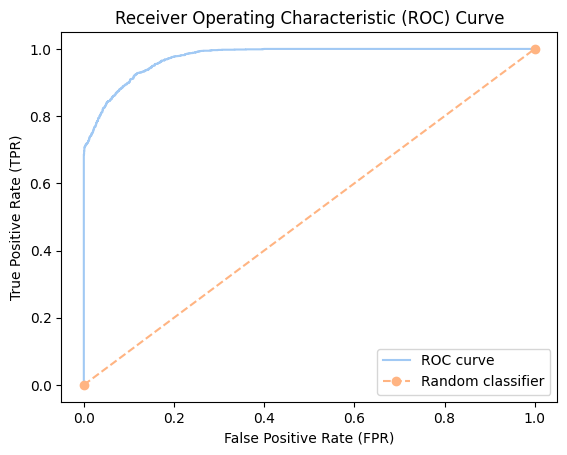

In [30]:
from sklearn.metrics import roc_curve

# Assuming your DataFrame is named 'data'

# Split the data into features (X) and target variable (y)
X = data.drop('diabetes', axis=1)  # Features
y = data['diabetes']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Create a LightGBM Classifier model and fit it to the training data
model = LGBMClassifier()
model.fit(X_train, y_train)

# Predict the target variable on the test data
y_pred = model.predict(X_test)

# Calculate the predicted probabilities for positive class (1) in binary classification
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'o--', label='Random classifier')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [31]:
model_names = ['Logistic Regression', 'Random Forest', 'LightGBM', 'Support Vector Machine']
accuracy_scores = [0.87, 0.90, 0.91, 0.86]
precision_scores = [0.86, 0.89, 0.89, 0.82]
recall_scores = [0.89, 0.92, 0.92, 0.91]
f1_scores = [0.87, 0.90, 0.91, 0.86]

# Create a dictionary to store the table
table = {
    'Model': model_names,
    'Accuracy': accuracy_scores,
    'Precision': precision_scores,
    'Recall': recall_scores,
    'F1-Score': f1_scores
}

# Convert the dictionary to a DataFrame
metrics_table = pd.DataFrame(table)

# Display the table
metrics_table

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.87,0.86,0.89,0.87
1,Random Forest,0.90,0.89,0.92,0.90
2,LightGBM,0.91,0.89,0.92,0.91
3,Support Vector Machine,0.86,0.82,0.91,0.86


## <font color='##8E44AD'>Conclusion

### The analysis demonstrates the feasibility of using machine learning models for diabetes prediction. The LightGBM and Random Forest models showed robust performance, making them promising candidates for practical implementation. However, the choice of the final model should consider factors like interpretability, precision-recall trade-offs, and domain-specific requirements. Further refinement and evaluation of the selected models will help in building a reliable and accurate diabetes prediction system